In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [78]:
df = pd.read_csv(r"C:\Users\Davie\Downloads\KU_project\GlobalSuperstore.csv",index_col='Row ID', encoding='latin1')

In [79]:
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
Row ID,,,,,,,,,,,,,,,,,,,,,
32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
26341,IN-2013-77878,5/2/2013,7/2/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical


In [9]:
df.shape

(51290, 23)

In [80]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 32298 to 6147
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        51290 non-null  object 
 1   Order Date      51290 non-null  object 
 2   Ship Date       51290 non-null  object 
 3   Ship Mode       51290 non-null  object 
 4   Customer ID     51290 non-null  object 
 5   Customer Name   51290 non-null  object 
 6   Segment         51290 non-null  object 
 7   City            51290 non-null  object 
 8   State           51290 non-null  object 
 9   Country         51290 non-null  object 
 10  Postal Code     9994 non-null   float64
 11  Market          51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Product ID      51290 non-null  object 
 14  Category        51290 non-null  object 
 15  Sub-Category    51290 non-null  object 
 16  Product Name    51290 non-null  object 
 17  Sales           51290 non-nu

1. Profile the customers based on their frequency of purchase - calculate frequency of purchase for each customer

In [81]:
# Group the data by 'Customer ID' and count the number of unique 'Order ID' entries
grp = df.groupby('Customer ID')['Order ID'].nunique()

# Create a DataFrame with customer ID and frequency of purchase
customer_purchase = pd.DataFrame(grp).reset_index()
customer_purchase.columns = ['Customer ID', 'Frequency of Purchase']

# Merge customer purchase frequency DataFrame with the original DataFrame
merge_df = pd.merge(df,customer_purchase, on = 'Customer ID')
# Select relevant columns

result = merge_df[['Customer ID','Customer Name','Country', 'Product Name', 'Frequency of Purchase']]

# Drop duplicates to keep only one row per customer
result = result.drop_duplicates(subset=['Customer ID'])

#sort the Frequency of Purchase top 50
result = result.sort_values(by ='Frequency of Purchase',ascending = False).head(10).reset_index(drop=True)

result

,Customer ID,Customer Name,Country,Product Name,Frequency of Purchase
0,PO-18850,Patrick O'Brill,United States,Samsung Galaxy Mega 6.3,41
1,KH-16690,Kristen Hastings,United States,Samsung Galaxy S4 Active,39
2,MP-17965,Michael Paige,Vietnam,"Novimex Executive Leather Armchair, Black",39
3,WB-21850,William Brown,United States,GBC DocuBind TL200 Manual Binding Machine,38
4,CK-12205,Chloris Kastensmidt,Italy,"Hewlett Wireless Fax, High-Speed",38
5,JH-15985,Joseph Holt,United States,Chromcraft Bull-Nose Wood Oval Conference Tabl...,38
6,AR-10825,Anthony Rawles,United States,Polycom SoundPoint IP 450 VoIP phone,38
7,FO-14305,Frank Olsen,France,"Smead Lockers, Industrial",37
8,NS-18640,Noel Staavos,New Zealand,"Cuisinart Stove, Black",37
9,ZC-21910,Zuschuss Carroll,Germany,"Cuisinart Stove, Silver",37


2 Do the high frequent customers are contributing more revenue 

In [146]:
# Calculate total sales for each customer
total_sales = df.groupby('Customer ID')['Sales'].sum().reset_index()
total_sales.columns = ['Customer ID', 'Total Sales']

# Merge total sales with frequency of purchase
result = pd.merge(total_sales, customer_purchase, on='Customer ID')

# Calculate the total sales of all customers
total_sales_all = result['Total Sales'].sum()

# Calculate the revenue contribution percentage for each customer
result['Revenue Contribution (%)'] = (result['Total Sales'] / total_sales_all) * 100

# Sort by frequency of purchase in descending order
result = result.sort_values(by='Revenue Contribution (%)', ascending=False)

# Reset index
result = result.reset_index(drop=True)

# Display the result
result.head(30)


,Customer ID,Total Sales,Frequency of Purchase,Revenue Contribution (%)
0,TA-21385,35668.12080,25,0.282129
1,GT-14710,34471.89028,30,0.272667
2,TC-20980,34218.26900,28,0.270661
3,SM-20320,31125.29496,21,0.246196
4,BW-11110,30613.61650,35,0.242148
5,HL-15040,29664.23058,20,0.234639
6,SE-20110,29532.62502,36,0.233598
7,PS-19045,29252.31940,26,0.231381
8,RB-19360,29197.63460,25,0.230948
9,ZC-21910,28472.81926,37,0.225215


3.     Are they also profitable - what is the profit margin across the buckets

In [83]:
# Calculate total profit for each customer
total_profit = df.groupby('Customer ID')['Profit'].sum().reset_index()
total_profit.columns = ['Customer ID', 'Total Profit']

# Merge total profit with frequency of purchase
result = pd.merge(total_profit, customer_purchase, on='Customer ID')

# Calculate the profit margin (profit/sales) for each customer
result['Profit Margin'] = result['Total Profit'] / total_sales['Total Sales']

# Sort by frequency of purchase in descending order
result = result.sort_values(by='Profit Margin', ascending=False)

# Reset index
result = result.reset_index(drop=True)

# Display the result
result.head(10)


,Customer ID,Total Profit,Frequency of Purchase,Profit Margin
0,RW-9630,252.6000,2,0.451063
1,JO-5280,702.6900,4,0.414603
2,HM-4860,413.4000,4,0.396444
3,TT-11070,621.9600,2,0.395566
4,GZ-4545,1460.2980,6,0.394847
5,AM-705,509.9400,6,0.391127
6,PC-8745,484.2300,5,0.388453
7,CC-2685,1556.2320,5,0.387179
8,KM-6720,1122.0240,3,0.383119
9,AR-10540,3050.9133,15,0.382131


4. Which customer segment is most profitable in each year.

In [153]:
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'],format='%d/%m/%Y')

# Extract the year from 'Order Date'
df['Year'] = df['Order Date'].dt.year

# Calculate total profit for each customer segment in each year
segment_profit = df.groupby(['Year', 'Segment'])['Profit'].sum().reset_index()

most_profitable_segments = segment_profit.loc[segment_profit.groupby('Year')['Profit'].idxmax()].reset_index(drop=True)

# Calculate total profit for each year
total_profit_per_year = segment_profit.groupby('Year')['Profit'].sum()

# Calculate the percentage of profit contributed by each segment in each year
most_profitable_segments['Profit Percentage'] = most_profitable_segments.apply(
    lambda x: (x['Profit'] / total_profit_per_year[x['Year']]) * 100, axis=1
).round(1)
most_profitable_segments


,Year,Segment,Profit,Profit Percentage
0,2011,Consumer,117326.0,47.1
1,2012,Consumer,165769.0,53.9
2,2013,Consumer,208444.0,51.2
3,2014,Consumer,257715.0,51.1


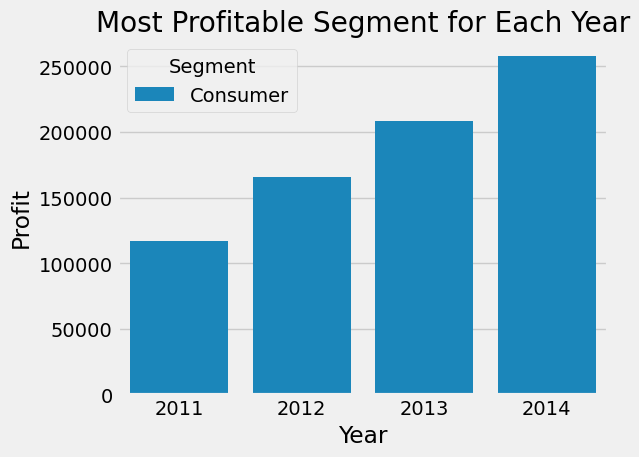

In [18]:
# Create a bar plot for most profitable segment
sns.barplot(x='Year', y='Profit', hue='Segment', data=most_profitable_segments)
plt.title('Most Profitable Segment for Each Year')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.legend(title='Segment', loc='upper left')
plt.tight_layout()
plt.show()


5.     How are the customers distributed across the countries?

In [88]:
# Calculate the number of unique customers in each country
customer_distribution = df.groupby('Country')['Customer ID'].nunique().reset_index()
customer_distribution.columns = ['Country', 'Number of Customers']

# Sort the customer distribution by the number of customers from highest to lowest
customer_distribution = customer_distribution.sort_values(by='Number of Customers', ascending=False).reset_index(drop=True)

customer_distribution.head(20)

,Country,Number of Customers
0,United States,793
1,France,679
2,Mexico,670
3,Australia,660
4,Germany,582
5,China,549
6,United Kingdom,529
7,India,494
8,Brazil,472
9,Indonesia,469


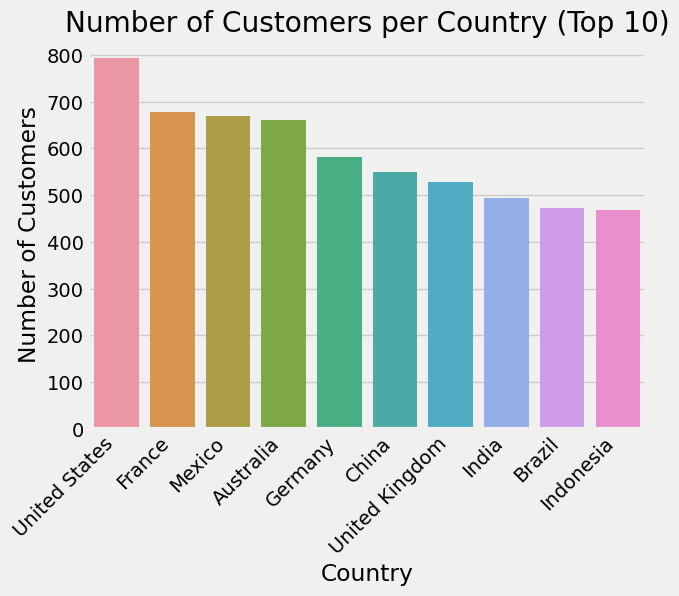

In [89]:
# Plot the bar graph
sns.barplot(x='Country', y='Number of Customers', data=customer_distribution.head(10))

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set the title and labels
plt.title('Number of Customers per Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Number of Customers')

# Show the plot
plt.show()


Which country has top sales?

In [90]:
# Calculate total sales for each country
country_sales = df.groupby('Country')['Sales'].sum().reset_index()
country_sales.columns = ['Country', 'Total Sales']

# Find the country with the highest total sales
top_countries_sales = country_sales.nlargest(3, 'Total Sales').reset_index(drop=True)

top_countries_sales


,Country,Total Sales
0,United States,2.297201e+06
1,Australia,9.252359e+05
2,France,8.589311e+05


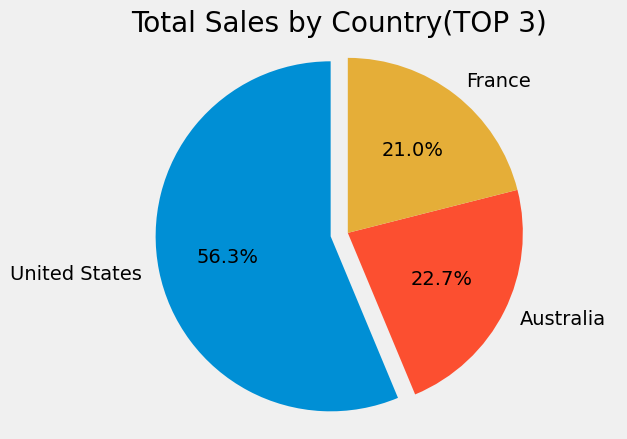

In [30]:
# Data for the pie chart
labels = top_countries_sales['Country']
sizes = top_countries_sales['Total Sales']
#colors = ['gold', 'lightblue', 'lightcoral']
explode = (0.1, 0, 0)  # explode the 1st slice

# Plotting the pie chart
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Total Sales by Country(TOP 3)')
plt.show()

 Which are the top 5 profit-making product types on a yearly basis?

In [91]:
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

# Extract the year from 'Order Date'
df['Year'] = df['Order Date'].dt.year

# Calculate total profit for each product type in each year
product_profit = df.groupby(['Year', 'Category', 'Sub-Category'])['Profit'].sum().reset_index()


# Find the top 5 profit-making product types on a yearly basis
profit_products = product_profit.groupby('Year').apply(lambda x: x.nlargest(5, 'Profit'))
profit_products['Profit'] = pd.to_numeric(profit_products['Profit'])

profit_products = profit_products.set_index('Year')
profit_products


,Category,Sub-Category,Profit
Year,,,
2011,Technology,Phones,53927.48950
2011,Technology,Copiers,30375.09344
2011,Furniture,Chairs,29943.15710
2011,Furniture,Bookcases,27518.85750
2011,Office Supplies,Appliances,22838.44130
2012,Technology,Copiers,51843.22760
2012,Technology,Phones,45223.04980
2012,Technology,Accessories,33507.10020
2012,Furniture,Chairs,28755.34670


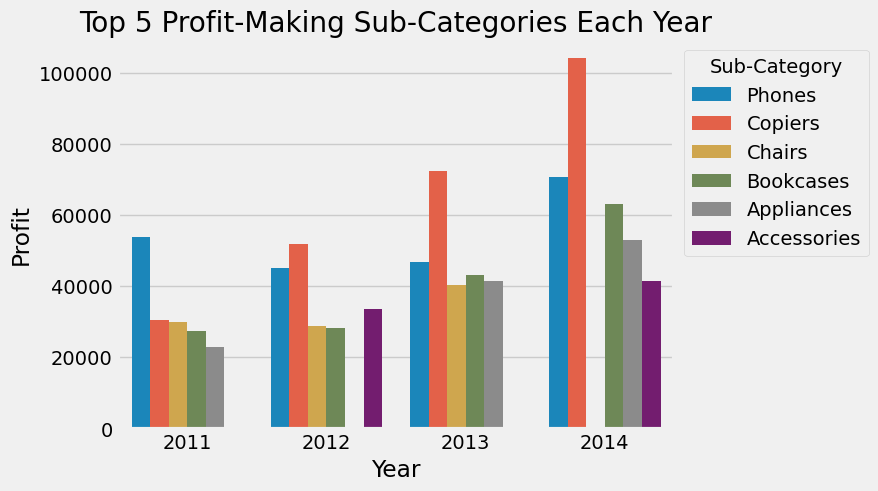

In [34]:
# Plot the grouped bar graph
sns.barplot(x='Year', y='Profit', hue='Sub-Category', data=profit_products.reset_index(), dodge=True)

# Set the title and labels
plt.title('Top 5 Profit-Making Sub-Categories Each Year')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.legend(title='Sub-Category', bbox_to_anchor=(1, 1), loc='upper left')

# Show the plot
plt.show()

How is the product price varying with sales - Is there any increase in sales with the decrease in price at any level?

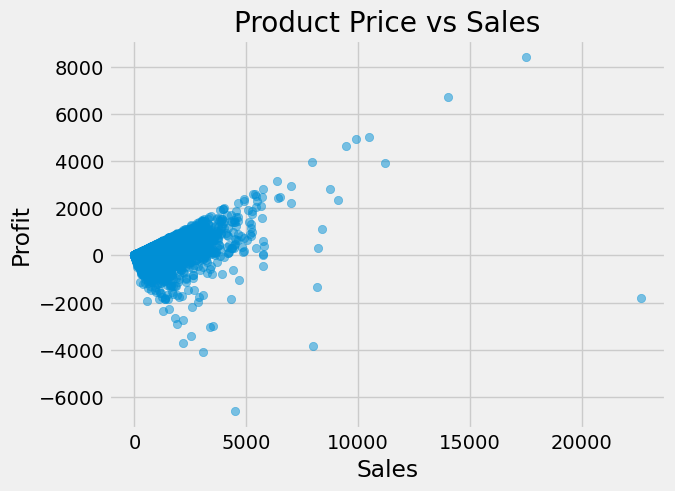

In [92]:
# Plot a scatter plot of sales against price
plt.scatter(df['Sales'], df['Profit'], alpha=0.5)
plt.title('Product Price vs Sales')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.savefig('Product Price vs Sales.png')

plt.show()


   What is the average delivery time across the countries?

In [144]:
# Convert 'Order Date' and 'Ship Date' to datetime format with multiple formats
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

# Calculate delivery time for each order
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# Convert 'Delivery Time' column to integer
df['Delivery Time'] = pd.to_numeric(df['Delivery Time'], errors='coerce').fillna(0).astype(int)

# Calculate the average delivery time across countries
average_delivery_time = df.groupby('Country')['Delivery Time'].mean().reset_index()

# Replace negative average delivery times with 1 day
average_delivery_time['Delivery Time'] = average_delivery_time['Delivery Time'].apply(lambda x: 1 if x < 0 else x)

average_delivery_time['Delivery Time'] = average_delivery_time['Delivery Time'].round()


# Rename the column
average_delivery_time.columns = ['Country', 'Average Delivery Time (Days)']

average_delivery_time


,Country,Average Delivery Time (Days)
0,Afghanistan,1.0
1,Albania,1.0
2,Algeria,1.0
3,Angola,1.0
4,Argentina,1.0
...,...,...
142,Venezuela,1.0
143,Vietnam,1.0
144,Yemen,1.0
145,Zambia,1.0


What is the profit by month? 

In [117]:
#Converting datetime to %d/%m/%Y
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Month'] = df['Order Date'].dt.month
profit_by_month = df.groupby('Month')['Profit'].sum().reset_index()
df['Profit'] = df['Profit'].round(1)
#Setting month to be index
profit_by_month = profit_by_month.set_index('Month')


profit_by_month


,Profit
Month,
1,90568.0
2,96421.0
3,123911.0
4,95923.0
5,111045.0
6,144457.0
7,85836.0
8,135580.0
9,128713.0


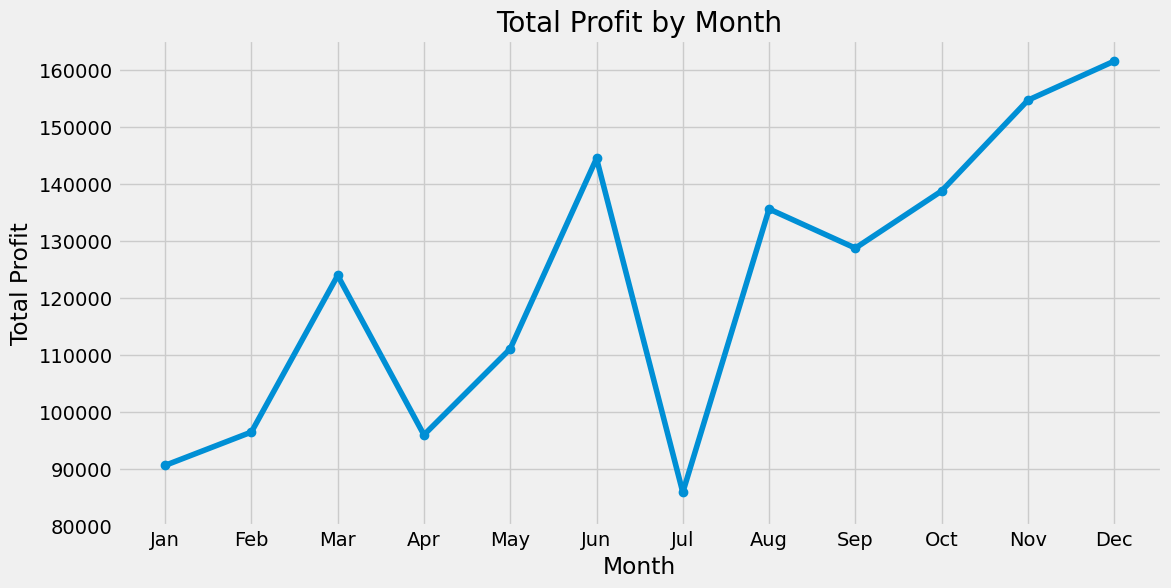

In [118]:
# Plot a line graph for total profit by month
plt.figure(figsize=(12, 6))
profit_by_month['Profit'].plot(kind='line', marker='o')
plt.title('Total Profit by Month')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylim(80000, None)  # Set the y-axis limits from 50000 to the maximum value (None)
plt.grid(True)
plt.show()


 Profit by category? By Subcategory?

In [119]:
# Profit by category
profit_by_category = df.groupby('Category')['Profit'].sum().reset_index()
df['Profit'] =df['Profit'].round(1)

profit_by_category = profit_by_category.sort_values(by='Profit',ascending =False).reset_index(drop=True)

print("Profit by Category:")
profit_by_category


Profit by Category:


,Category,Profit
0,Technology,663740.0
1,Office Supplies,518443.0
2,Furniture,285244.0


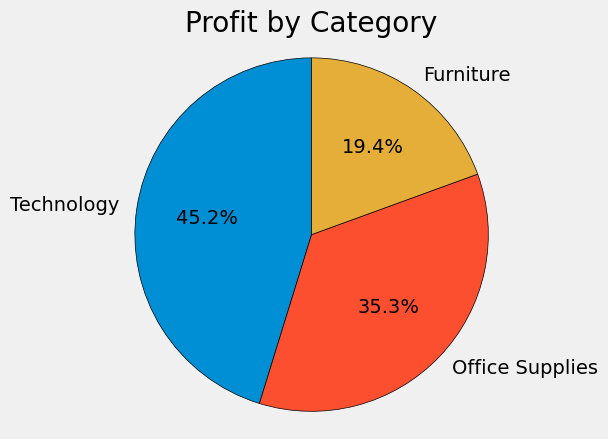

In [120]:
# Plotting the pie chart
plt.pie(profit_by_category['Profit'], labels=profit_by_category['Category'], autopct='%1.1f%%', startangle=90,wedgeprops={'edgecolor':'black'})
plt.axis('equal')  
plt.title('Profit by Category')
plt.show()

In [122]:
# Profit by subcategory
profit_by_subcategory = df.groupby('Sub-Category')['Profit'].sum().reset_index()
profit_by_subcategory =profit_by_subcategory.sort_values(by='Profit',ascending=False).reset_index(drop=True)
print("Profit by Subcategory:")
profit_by_subcategory


Profit by Subcategory:


,Sub-Category,Profit
0,Copiers,258574.0
1,Phones,216698.0
2,Bookcases,161934.0
3,Appliances,141662.0
4,Chairs,140420.0
5,Accessories,129612.0
6,Storage,108484.0
7,Binders,72394.0
8,Paper,59228.0
9,Machines,58856.0


 Sales by month? By category? By subcategory?

In [124]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

# Extract month from 'Order Date'
df['Month'] = df['Order Date'].dt.month

# Sales by month
sales_by_month = df.groupby('Month')['Sales'].sum().reset_index()

sales_by_month = sales_by_month.set_index('Month')
print("Sales by Month:")
sales_by_month


Sales by Month:


,Sales
Month,
1,7.757669e+05
2,7.228532e+05
3,9.513331e+05
4,8.516173e+05
5,9.764157e+05
6,1.152368e+06
7,8.387436e+05
8,1.247501e+06
9,1.244140e+06


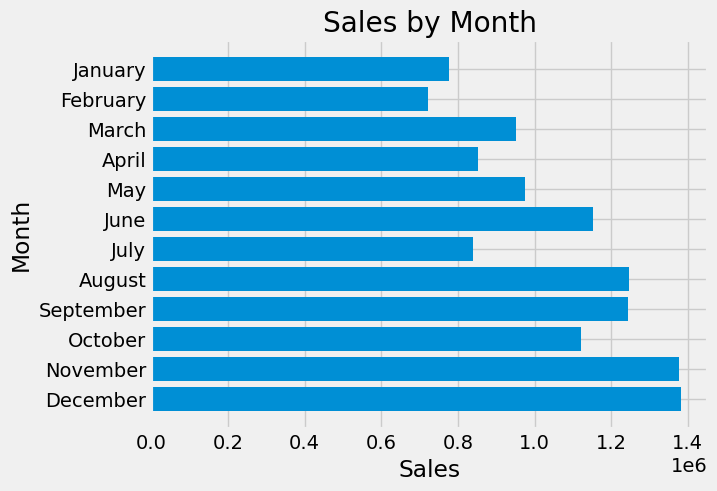

In [56]:
#GRAPH FOR MONTHS AND SALES
# Plotting the horizontal bar graph
plt.barh(sales_by_month.index, sales_by_month['Sales'])
plt.xlabel('Sales')
plt.ylabel('Month')
plt.title('Sales by Month')
plt.yticks(sales_by_month.index, labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.gca().invert_yaxis()  # Invert y-axis to display January at the top
plt.show()

In [141]:
# Sales by category
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()
total_sales = df['Sales'].sum()

sales_by_category['Sales'] = sales_by_category['Sales'].apply(lambda x: f"{x:,.2f}")
sales_by_category['Sales'] = sales_by_category['Sales'].apply(lambda x: float(x.replace(',', '')))
# Sorting
sales_by_category = sales_by_category.sort_values(by='Sales', ascending=False).reset_index(drop=True)

print('Sales by category')
sales_by_category


Sales by category


,Category,Sales
0,Technology,4744557.50
1,Furniture,4110874.19
2,Office Supplies,3787070.23


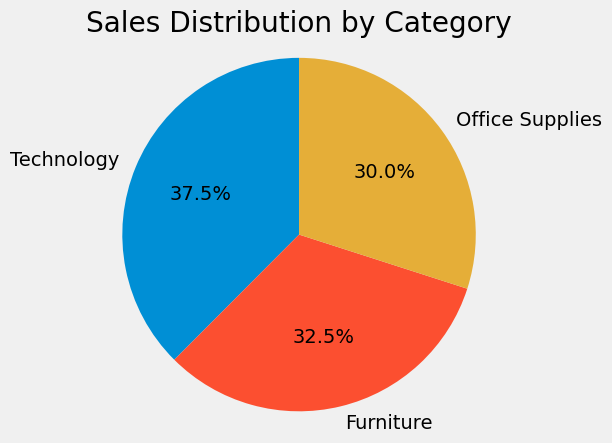

In [138]:
#PIE CHART CATEGORY AND SALES
plt.pie(sales_by_category['Sales'], labels=sales_by_category['Category'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Sales Distribution by Category')
plt.show()

In [139]:
# Sales by subcategory
sales_by_subcategory = df.groupby('Sub-Category')['Sales'].sum().reset_index()
#sort
sales_by_subcategory['Sales'] = sales_by_subcategory['Sales'].apply(lambda x: f"{x:,.0f}")


print('sales_by_subcategory')
sales_by_subcategory

sales_by_subcategory


,Sub-Category,Sales
0,Accessories,"749,237"
1,Appliances,"1,011,064"
2,Art,"372,092"
3,Binders,"461,912"
4,Bookcases,"1,466,572"
5,Chairs,"1,501,682"
6,Copiers,"1,509,436"
7,Envelopes,"170,904"
8,Fasteners,"83,242"
9,Furnishings,"385,578"
